In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
otu_df = pd.read_csv('dataframes/OTU.csv', sep='\t', index_col='OTU')
taxonomy_df = pd.read_csv('dataframes/hiera_BLAST.csv', sep='\t', index_col='OTU')
metadata_df = pd.read_csv('dataframes/YOGURT-MAP.csv', sep='\t', index_col='#SampleID')
path_df = pd.read_csv('dataframes/path_df.csv', sep = ',')
metadata_df = metadata_df.drop(columns=['fastqFile', 'Weight'])
df_cmc = pd.read_csv('dataframes/output_data/OTU/df_cmc.csv', sep='\t', index_col=0)
df_cmy = pd.read_csv('dataframes/output_data/OTU/df_cmy.csv', sep='\t', index_col=0)
pathway_meta = pd.read_csv('dataframes/output_data/pathway/relative_abundance.csv', sep=',', index_col=0)

In [3]:
meta = metadata_df.copy()
#meta = metadata.reset_index().rename(columns={'#SampleID': 'SampleID'}).set_index("SampleID")
meta = meta[~meta['Group'].isin(['w1_sch', 'w1_pry', 'w4_con'])]
meta['Group'] = meta['Group'].replace({'w1_con': 'CN', 'w4_sch': 'CMC', 'w4_pry':'CMY'})
metadata_df = metadata_df.reset_index()
meta = meta.reset_index()
mismatched_values = metadata_df[~metadata_df['#SampleID'].isin(meta['#SampleID'])]['#SampleID']
len(mismatched_values)
len(meta[meta['Group']=='CMY'])

9

In [4]:
path = path_df.drop(columns={'Unnamed: 0'})
path = path.drop(columns=mismatched_values)
pathway_data = path
metadata = meta#.drop(columns=['index'])
path_to_rel = pathway_data.drop(columns=['pathway', 'description'])
column_sums = path_to_rel.sum()
relative_abundance = pathway_data.divide(column_sums, axis='columns')

In [5]:
df_cmy

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1501,OTU1502,OTU1503,OTU1505,OTU1507,OTU1509,OTU1510,OTU1512,OTU1513,OTU1514
AC1,CMY,0.071246,0.077639,0.012635,0.031167,0.004220,0.027747,0.009662,0.052377,0.006865,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC2,CMY,0.082343,0.030703,0.046658,0.009612,0.006941,0.023050,0.010086,0.019767,0.003436,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC3,CMY,0.089913,0.048548,0.016842,0.022856,0.004225,0.018149,0.005647,0.057006,0.004707,...,0.000000,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC4,CMY,0.021595,0.014946,0.017751,0.015281,0.004548,0.014634,0.003708,0.005603,0.014754,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC5,CMY,0.080641,0.136312,0.017946,0.014063,0.003426,0.024029,0.003810,0.041682,0.002420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000,0.000000
AC6,CMY,0.090016,0.055956,0.017955,0.047725,0.003711,0.044788,0.011099,0.023331,0.006625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC7,CMY,0.045135,0.027322,0.014476,0.011771,0.010131,0.022610,0.014203,0.038113,0.003713,...,0.000019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC8,CMY,0.015518,0.038855,0.026840,0.014909,0.005066,0.048126,0.006546,0.085295,0.018224,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC9,CMY,0.039670,0.126300,0.029567,0.022688,0.002983,0.028702,0.005480,0.031894,0.003839,...,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000
BC1,CN,0.025323,0.023843,0.038332,0.034115,0.047433,0.035096,0.007629,0.003474,0.032492,...,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# Преобразуем датафрейм из широкого формата в длинный
pathway_data_long = pathway_data.melt(id_vars=['pathway', 'description'], var_name='#SampleID', value_name='Abundance')

# Объединяем с метаданными
pathway_meta = pathway_data_long.merge(metadata, on="#SampleID")
total_abundance_per_sample = pathway_meta.groupby('#SampleID')['Abundance'].sum()
pathway_meta['relative_abundance'] = pathway_meta.apply(lambda row: row['Abundance'] / total_abundance_per_sample[row['#SampleID']], axis=1)
#pathway_meta = pathway_meta.drop(columns=['index']).rename(columns = {'#SampleID':'SampleID'})

#pathway_meta = pathway_meta.drop(pathway_meta[pathway_meta['#SampleID'].str.contains('AB10')].index)
#pathway_meta = pathway_meta.drop(pathway_meta[pathway_meta['#SampleID'].str.contains('BA10')].index)
#pathway_meta.to_csv('dataframes/output_data/relative_abundance.tsv', sep='\t', index=False)
pathway_meta.to_csv('dataframes/output_data/pathway/pathwat_done.csv', sep='\t', index = False)
pathway_meta


,pathway,description,#SampleID,Abundance,Group,relative_abundance
0,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,AB1,56985.915525,CN,6.932489e-03
1,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,4-hydroxyphenylacetate degradation,AB1,14.062229,CN,1.710708e-06
2,AEROBACTINSYN-PWY,aerobactin biosynthesis,AB1,0.000000,CN,0.000000e+00
3,ALL-CHORISMATE-PWY,superpathway of chorismate metabolism,AB1,497.560257,CN,6.052954e-05
4,ANAEROFRUCAT-PWY,homolactic fermentation,AB1,62225.308477,CN,7.569876e-03
...,...,...,...,...,...,...
11798,TYRFUMCAT-PWY,L-tyrosine degradation I,BA9,1912.219795,CMC,1.881668e-04
11799,UBISYN-PWY,superpathway of ubiquinol-8 biosynthesis (prok...,BA9,1836.745445,CMC,1.807399e-04
11800,UDPNAGSYN-PWY,UDP-N-acetyl-D-glucosamine biosynthesis I,BA9,42170.145429,CMC,4.149638e-03
11801,VALDEG-PWY,L-valine degradation I,BA9,5.980163,CMC,5.884617e-07


In [7]:
filtered_pathway_meta_cmc = pathway_meta[pathway_meta['#SampleID'].str.startswith(('AB', 'BA'))]
filtered_pathway_meta_cmy = pathway_meta[pathway_meta['#SampleID'].str.startswith(('AB', 'AC'))]
filtered_pathway_meta_cmc.to_csv('delete.csv', sep = ',')
filtered_pathway_meta_cmc

,pathway,description,#SampleID,Abundance,Group,relative_abundance
0,1CMET2-PWY,N10-formyl-tetrahydrofolate biosynthesis,AB1,56985.915525,CN,6.932489e-03
1,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,4-hydroxyphenylacetate degradation,AB1,14.062229,CN,1.710708e-06
2,AEROBACTINSYN-PWY,aerobactin biosynthesis,AB1,0.000000,CN,0.000000e+00
3,ALL-CHORISMATE-PWY,superpathway of chorismate metabolism,AB1,497.560257,CN,6.052954e-05
4,ANAEROFRUCAT-PWY,homolactic fermentation,AB1,62225.308477,CN,7.569876e-03
...,...,...,...,...,...,...
11798,TYRFUMCAT-PWY,L-tyrosine degradation I,BA9,1912.219795,CMC,1.881668e-04
11799,UBISYN-PWY,superpathway of ubiquinol-8 biosynthesis (prok...,BA9,1836.745445,CMC,1.807399e-04
11800,UDPNAGSYN-PWY,UDP-N-acetyl-D-glucosamine biosynthesis I,BA9,42170.145429,CMC,4.149638e-03
11801,VALDEG-PWY,L-valine degradation I,BA9,5.980163,CMC,5.884617e-07


In [8]:
from scipy import stats
import numpy as np

df_cmc = filtered_pathway_meta_cmc.copy()
p_values_cmc = df_cmc.groupby('description').apply(lambda x: stats.ttest_ind(x[x['Group']=='CN']['relative_abundance'], x[x['Group']=='CMC']['relative_abundance'])[1])
corrected_p_values_cmy = p_values_cmc * len(p_values_cmc)

# Создаем сводную таблицу для дальнейшего анализа
heatmap_df_cmc = df_cmc.pivot_table(index='description', columns='Group', values='relative_abundance', aggfunc='mean')

# Убираем значения, где p-value >= 0.05
#heatmap_df_cmc[p_values_cmc >= 0.05] = np.nan
heatmap_df_cmc[corrected_p_values_cmy >= 0.05] = np.nan
heatmap_df_cmc = heatmap_df_cmc.dropna()

# Рассчитываем разницу средних
df_means_cmc = heatmap_df_cmc['CN'] - heatmap_df_cmc['CMC']
df_means_cmc = df_means_cmc.to_frame()
df_means_cmc.columns = ['diff']

# Объединяем все в один датафрейм
final_df_cmc = heatmap_df_cmc.join(p_values_cmc.rename('p_value')).join(df_means_cmc)
final_df_cmc = final_df_cmc.dropna()
print(f'Count of pathways is: {final_df_cmc.shape[0]}')
final_df_cmc.to_csv('dataframes/output_data/pathway/final_pathway_cmc.csv', sep = '\t', index=True)
final_df_cmc

Count of pathways is: 6


,CMC,CN,p_value,diff
description,,,,
"1,4-dihydroxy-6-naphthoate biosynthesis I",0.000271,0.000112,5.138605e-05,-0.000160
pyridoxal 5'-phosphate biosynthesis I,0.002145,0.001050,1.752780e-05,-0.001095
pyrimidine deoxyribonucleotides de novo biosynthesis III,0.002388,0.003038,1.066452e-04,0.000650
pyruvate fermentation to propanoate I,0.004610,0.002238,1.128909e-07,-0.002372
superpathway of menaquinol-8 biosynthesis II,0.000779,0.000394,7.281888e-05,-0.000385
superpathway of pyridoxal 5'-phosphate biosynthesis and salvage,0.002352,0.001316,1.020663e-05,-0.001035


In [9]:
heatmap_df_cmc

Group,CMC,CN
description,,
"1,4-dihydroxy-6-naphthoate biosynthesis I",0.000271,0.000112
chlorosalicylate degradation,0.000000,0.000000
pyridoxal 5'-phosphate biosynthesis I,0.002145,0.001050
pyrimidine deoxyribonucleotides de novo biosynthesis III,0.002388,0.003038
pyruvate fermentation to propanoate I,0.004610,0.002238
superpathway of bacteriochlorophyll a biosynthesis,0.000000,0.000000
superpathway of menaquinol-8 biosynthesis II,0.000779,0.000394
superpathway of polyamine biosynthesis III,0.000000,0.000000
superpathway of pyridoxal 5'-phosphate biosynthesis and salvage,0.002352,0.001316


In [10]:
from scipy import stats
import numpy as np

df_cmy = filtered_pathway_meta_cmy.copy()
p_values_cmy = df_cmy.groupby('description').apply(lambda x: stats.ttest_ind(x[x['Group']=='CN']['relative_abundance'], x[x['Group']=='CMY']['relative_abundance'])[1])
corrected_p_values_cmy = p_values_cmy * len(p_values_cmy)

# Создаем сводную таблицу для дальнейшего анализа
heatmap_df_cmy = df_cmy.pivot_table(index='description', columns='Group', values='relative_abundance', aggfunc='mean')

# Убираем значения, где p-value >= 0.05
heatmap_df_cmy[corrected_p_values_cmy >= 0.05] = np.nan

#heatmap_df_cmy[p_values_cmy >= 0.05] = np.nan
heatmap_df_cmy = heatmap_df_cmy.dropna()

# Рассчитываем разницу средних
df_means_cmy = heatmap_df_cmy['CN'] - heatmap_df_cmy['CMY']
df_means_cmy = df_means_cmy.to_frame()
df_means_cmy.columns = ['diff']

# Объединяем все в один датафрейм
final_df_cmy = heatmap_df_cmy.join(p_values_cmy.rename('p_value')).join(df_means_cmy)
final_df_cmy = final_df_cmy.dropna()
print(f'Count of pathways is: {final_df_cmy.shape[0]}')
final_df_cmy.to_csv('dataframes/output_data/pathway/final_pathway_cmy.csv', sep = '\t', index=True)

Count of pathways is: 26


/tmp/ipykernel_82437/1355804707.py:25: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



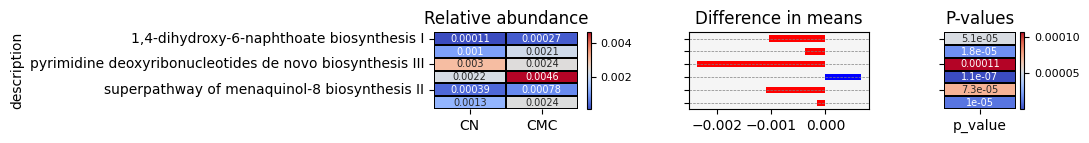

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 1), gridspec_kw={'width_ratios': [4, 4, 2], 'wspace': 0.5})
plt.subplots_adjust(left=0.6, right=0.9)

colors = ['blue' if x > 0 else 'red' for x in final_df_cmc['diff']]
final_df_cmc['diff'].plot(kind='barh', ax=ax2, color=colors, title='Difference in means')
ax2.yaxis.grid(True, color='gray', linewidth=0.5, linestyle='dashed')
ax2.set_facecolor("whitesmoke")
ax2.set_yticklabels([])
ax2.set_ylabel('')

# Reorder the columns for heatmap
final_df_cmc = final_df_cmc.rename(columns = {'CN_CMC':'CN'})
heatmap_df = final_df_cmc[['CN', 'CMC']]
heatmap = sns.heatmap(heatmap_df, cmap='coolwarm', cbar=False, annot=True, linewidths=.1, linecolor='black', cbar_kws={"shrink": 0.6}, ax=ax1, annot_kws={'size':7})
heatmap.figure.colorbar(heatmap.collections[0], ax=ax1).ax.tick_params(labelsize=8)
ax1.set_title(f'Relative abundance')

heatmap = sns.heatmap(final_df_cmc[['p_value']], cmap='coolwarm', cbar=False, annot=True, linewidths=.1, linecolor='black', ax=ax3, annot_kws={'size':7})
heatmap.figure.colorbar(heatmap.collections[0], ax=ax3).ax.tick_params(labelsize=8)
ax3.set_yticklabels([])
ax3.set_ylabel('')
ax3.set_title(f'P-values')

plt.suptitle("", fontsize=12, fontweight='bold', x = 0.7)
plt.tight_layout()
plt.savefig('figures/pathway/pathway_cmc.pdf', bbox_inches='tight')
plt.show()


In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

def pathway_plotly(data_df, group1, height = 300):
    # Создаем подзаголовки
    fig = make_subplots(rows=1, cols=3,
                        specs=[[{"type": "heatmap"}, {"type": "bar"}, {"type": "heatmap"}]],
                        subplot_titles=("Relative abundance", "Difference in means"))

    # Heatmap для относительного изобилия
    heatmap_df = data_df[['CN', group1]]
    fig.add_trace(go.Heatmap(z=heatmap_df.values,
                            x=heatmap_df.columns,
                            y=heatmap_df.index,
                            colorscale='RdBu',
                            showscale=False),  # Используем 'RdBu' вместо 'coolwarm'
                row=1, col=1)

    # Добавляем белые линии для границ
    n_rows, n_cols = heatmap_df.values.shape
    for i in range(n_rows + 1):
        fig.add_shape(type="line",
                    xref="x1", yref="y1",
                    x0=-0.5, y0=i - 0.5, x1=n_cols - 0.5, y1=i - 0.5,
                    line=dict(color="white"))

    for i in range(n_cols + 1):
        fig.add_shape(type="line",
                    xref="x1", yref="y1",
                    x0=i - 0.5, y0=-0.5, x1=i - 0.5, y1=n_rows - 0.5,
                    line=dict(color="white"))

    # Столбчатая диаграмма для разности средних
    colors = ['blue' if x > 0 else 'red' for x in data_df['diff']]
    fig.add_trace(go.Bar(y=data_df.index,
                        x=data_df['diff'],
                        orientation='h',
                        marker=dict(color=colors)),
                row=1, col=2)

    # Heatmap для p-значений (с границами)
    fig.add_trace(go.Heatmap(z=data_df[['p_value']].values,
                            x=['p_value'],
                            y=data_df.index,
                            colorscale='RdBu',
                            colorbar=dict(x=0.8)), # Позиция шкалы цвета
                row=1, col=3)

    # Добавляем белые линии для границ 3-го графика
    n_rows, n_cols = data_df[['p_value']].values.shape
    for i in range(n_rows + 1):
        fig.add_shape(type="line",
                    xref="x3", yref="y3",
                    x0=-0.5, y0=i - 0.5, x1=n_cols - 0.5, y1=i - 0.5,
                    line=dict(color="black"))

    for i in range(n_cols + 1):
        fig.add_shape(type="line",
                    xref="x3", yref="y3",
                    x0=i - 0.5, y0=-0.5, x1=i - 0.5, y1=n_rows - 0.5,
                    line=dict(color="black"))

    # Обновляем оси и прочие параметры графика
    fig.update_layout(height=height, width=1200, showlegend=False)
    fig.update_layout(
        xaxis1=dict(domain=[0.0, 0.3]), # Первый график
        xaxis2=dict(domain=[0.35, 0.6]), # Второй график
        xaxis3=dict(domain=[0.65, 0.75]) # Третий график
    )
    fig.update_yaxes(tickmode='array', tickvals=[], row=1, col=2)
    fig.update_yaxes(tickmode='array', tickvals=[], row=1, col=3)

    fig.write_html(f"figures/pathway/plotly_beta_{group1}.html")

    # Отображаем график
    fig.show()

pathway_plotly(final_df_cmc, 'CMC')


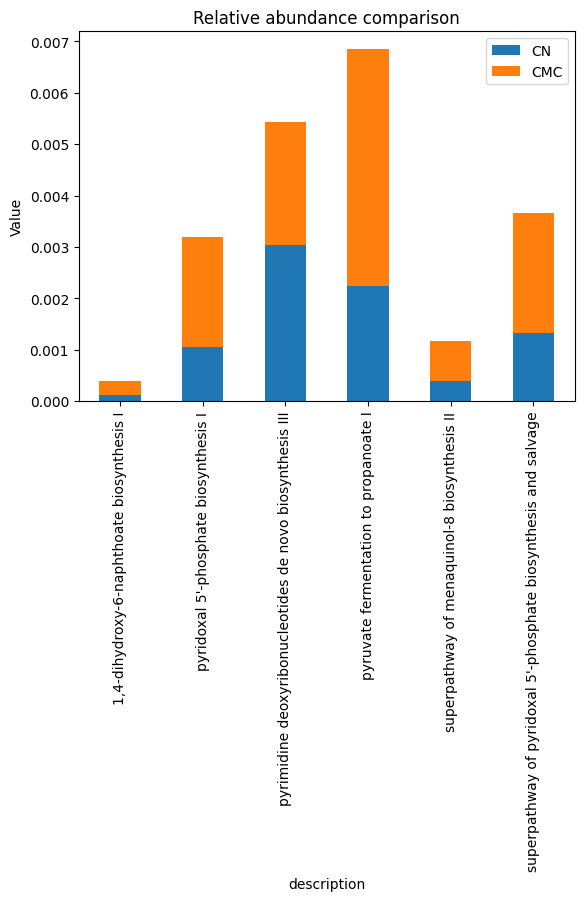

In [13]:
final_df_cmc[['CN', 'CMC']].plot(kind='bar', stacked=True)
plt.title('Relative abundance comparison')
plt.ylabel('Value')
plt.show()


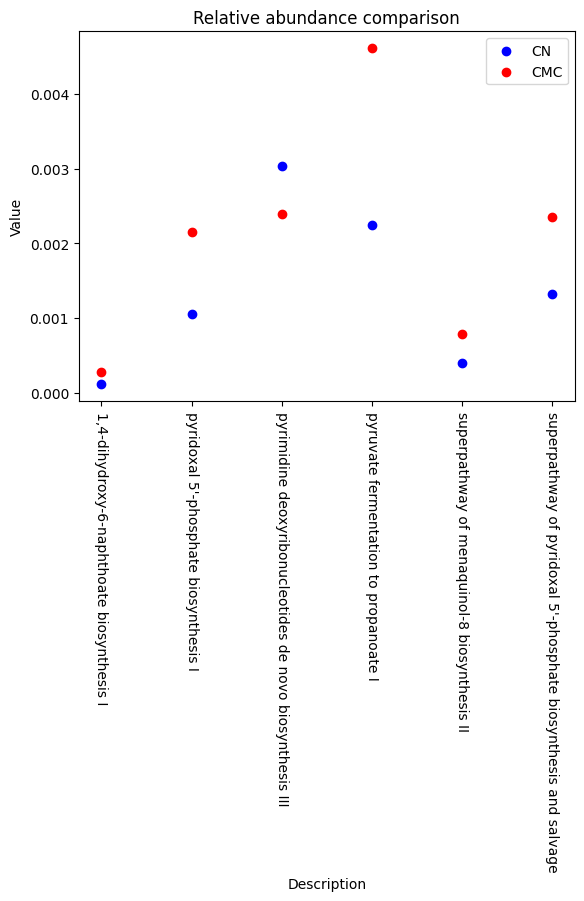

In [14]:
plt.scatter(final_df_cmc.index, final_df_cmc['CN'], color='blue', label='CN')
plt.scatter(final_df_cmc.index, final_df_cmc['CMC'], color='red', label='CMC')
plt.legend()
plt.title('Relative abundance comparison')
plt.xlabel('Description')
plt.ylabel('Value')
plt.xticks(rotation = 270)
plt.show()


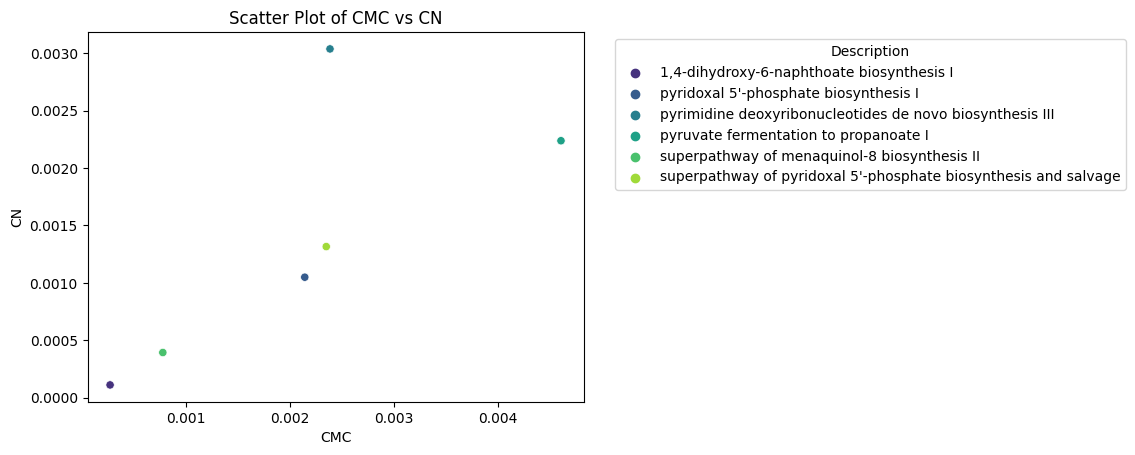

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание нового DataFrame с нужными колонками
plot_df = final_df_cmc[['CMC', 'CN']].reset_index()

# Построение диаграммы рассеивания
sns.scatterplot(x='CMC', y='CN', data=plot_df, hue='description', palette='viridis')

plt.xlabel('CMC')
plt.ylabel('CN')
plt.title('Scatter Plot of CMC vs CN')
plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


/tmp/ipykernel_82437/3664898468.py:25: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



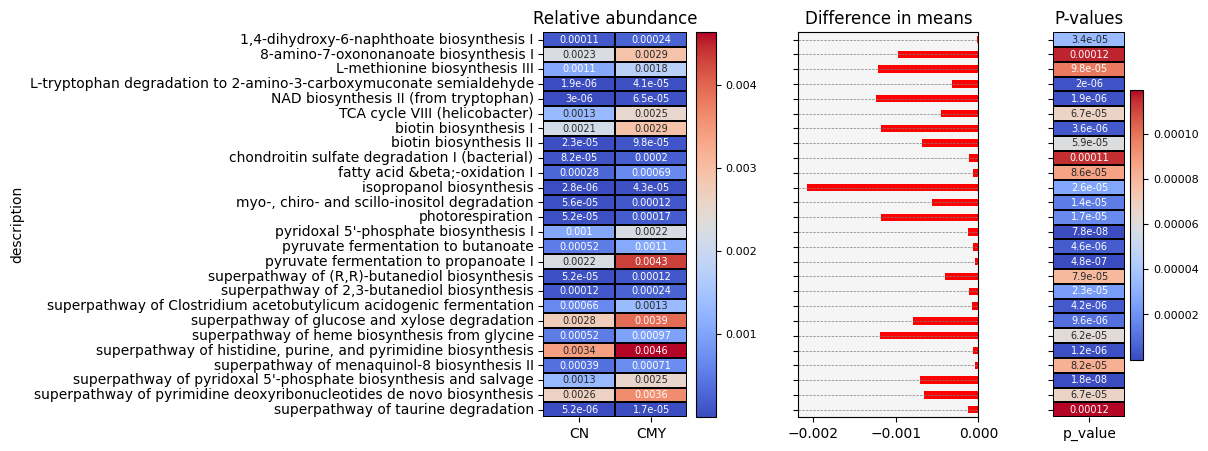

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), gridspec_kw={'width_ratios': [4, 4, 2], 'wspace': 0.5})
plt.subplots_adjust(left=0.6, right=0.9)

colors = ['blue' if x > 0 else 'red' for x in final_df_cmy['diff']]
final_df_cmy['diff'].plot(kind='barh', ax=ax2, color=colors, title='Difference in means')
ax2.yaxis.grid(True, color='gray', linewidth=0.5, linestyle='dashed')
ax2.set_facecolor("whitesmoke")
ax2.set_yticklabels([])
ax2.set_ylabel('')

# Reorder the columns for heatmap
final_df_cmy = final_df_cmy.rename(columns = {'CN_CMY':'CN'})
heatmap_df = final_df_cmy[['CN', 'CMY']]
heatmap = sns.heatmap(heatmap_df, cmap='coolwarm', cbar=False, annot=True, linewidths=.1, linecolor='black', cbar_kws={"shrink": 0.6}, ax=ax1, annot_kws={'size':7})
heatmap.figure.colorbar(heatmap.collections[0], ax=ax1).ax.tick_params(labelsize=8)
ax1.set_title(f'Relative abundance')

heatmap = sns.heatmap(final_df_cmy[['p_value']], cmap='coolwarm', cbar=False, annot=True, linewidths=.1, linecolor='black', ax=ax3, annot_kws={'size':7})
heatmap.figure.colorbar(heatmap.collections[0], ax=ax3).ax.tick_params(labelsize=8)
ax3.set_yticklabels([])
ax3.set_ylabel('')
ax3.set_title(f'P-values')

plt.suptitle("", fontsize=12, fontweight='bold', x = 0.7)
plt.tight_layout()
plt.savefig('figures/pathway/pathway_cmy.pdf', bbox_inches='tight')
plt.show()


In [17]:

pathway_plotly(final_df_cmy, 'CMY', 500)

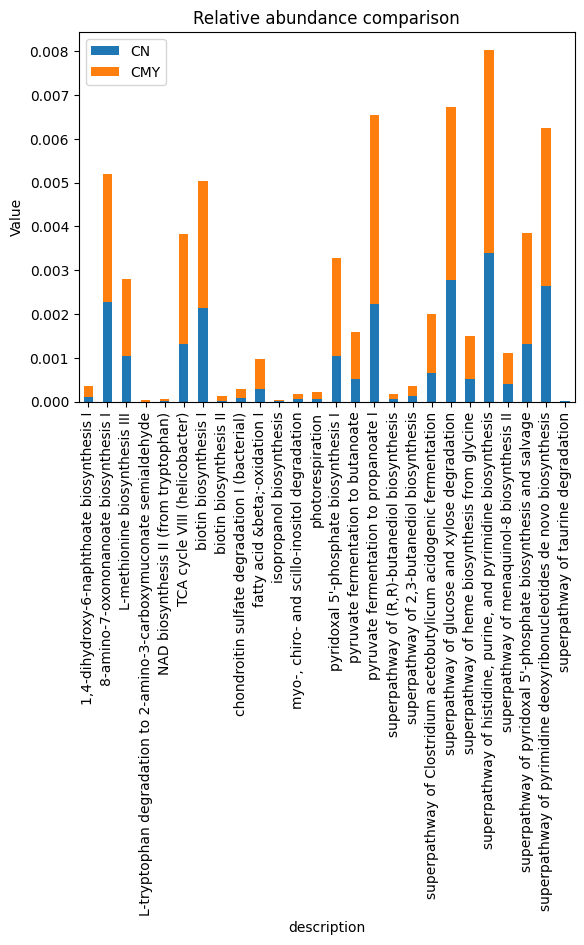

In [18]:
final_df_cmy[['CN', 'CMY']].plot(kind='bar', stacked=True)
plt.title('Relative abundance comparison')
plt.ylabel('Value')
plt.show()
